In [55]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

In [56]:
# Reading in each csv file for the imputed data
data = pd.read_csv('imputed_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,state_0,state_1,state_2,state_3,state_4,state_5,state_6,lp_amount,...,status_2,status_3,status_4,income,months,18_months,pay_method_ACH,pay_method_Other,pay_method_credit card,pay_method_paper check
0,0,2014.0,0,0,0,0,0,0,1,34.95,...,0,0,1,36250.0,0.87,0,0,0,1,0
1,1,2015.0,0,0,0,0,0,0,1,29.95,...,0,0,1,36250.0,0.00,0,0,0,1,0
2,2,2016.0,0,0,0,0,0,0,1,29.95,...,0,1,0,36250.0,0.00,0,0,0,1,0
3,3,2016.0,0,0,0,0,0,0,1,39.95,...,0,0,1,36250.0,0.67,0,0,0,1,0
4,5,2014.0,0,0,0,0,0,0,1,34.95,...,0,1,1,74083.0,0.57,0,0,0,1,0


In [57]:
# Separating out the y variable and selecting the continuous data that needs to be normalize
Y = data['18_months']
outlier_data = data[['income', 'lp_amount']]
data = data.drop(['Unnamed: 0', 'income', 'lp_amount'], axis=1)

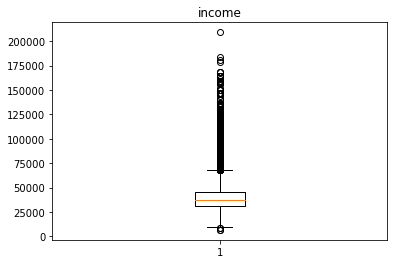

In [58]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

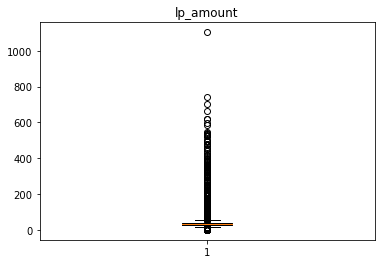

In [59]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['lp_amount'])    
# Naming the box plot after the name of the column     
plt.title('lp_amount')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f9ce45b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f9ce87320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f9ce45048>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f9ce87940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f9ce87710>],
 'means': []}

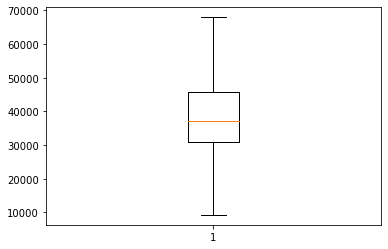

In [60]:
# Defining the function 'outlier' to help with major outliers in the 'lp_amount' column

def outlier(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

# Using the same definition and method above and apply it to the 'income' column
Q1 = outlier_data['income'].quantile(0.25)
Q3 = outlier_data['income'].quantile(0.75)
IQR = iqr(outlier_data['income'])
outlier_data['income'] = outlier_data['income'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6f9d2a9c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6f9cfa4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6f9d2a9c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f9cfa4588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f9cfa4b00>],
 'means': []}

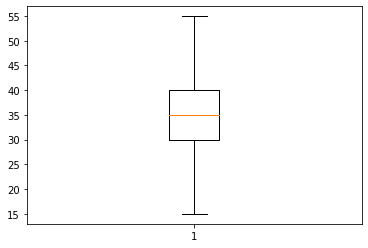

In [61]:
# Using the same definition and method above and apply it to the 'income' column
Q1 = outlier_data['lp_amount'].quantile(0.25)
Q3 = outlier_data['lp_amount'].quantile(0.75)
IQR = iqr(outlier_data['lp_amount'])
outlier_data['lp_amount'] = outlier_data['lp_amount'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['lp_amount'])

In [62]:
outlier_data.mean()

income       38225.140936
lp_amount       35.185814
dtype: float64

In [63]:
# Creating the columns names to be inputed into the new normalized data
norm_cols = ['income', 'lp_amount']

# Normalizing the two columns in 'outlier_data' using the MinMax function
minmax = preprocessing.MinMaxScaler()
norm = (minmax.fit_transform(outlier_data))
norm = pd.DataFrame(norm, columns=norm_cols)

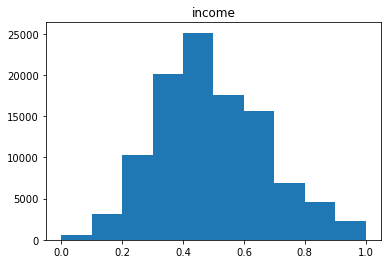

In [64]:
# Creating a histogram for the 'income' column
plt.hist(norm['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

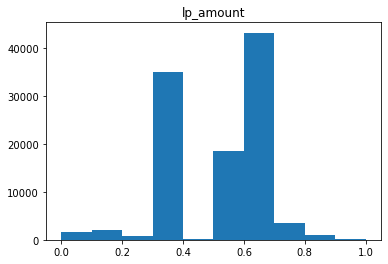

In [65]:
# Creating a histogram for the 'income' column
plt.hist(norm['lp_amount'])    
# Naming the box plot after the name of the column     
plt.title('lp_amount')
plt.show()

In [66]:
norm.mean()

income       0.493266
lp_amount    0.505895
dtype: float64

In [67]:
# Combining the two datasets (first and normalized) back into one
data = pd.concat([data, norm], axis = 1)

#Renaming the 18_months column to 'Y'
data['Y'] = data['18_months']
data = data.drop(['18_months'], axis = 1)

data.head()

,year,state_0,state_1,state_2,state_3,state_4,state_5,state_6,status_0,status_1,...,status_3,status_4,months,pay_method_ACH,pay_method_Other,pay_method_credit card,pay_method_paper check,income,lp_amount,Y
0,2014.0,0,0,0,0,0,0,1,0,0,...,0,1,0.87,0,0,1,0,0.459624,0.500,0
1,2015.0,0,0,0,0,0,0,1,0,0,...,0,1,0.00,0,0,1,0,0.459624,0.375,0
2,2016.0,0,0,0,0,0,0,1,0,0,...,1,0,0.00,0,0,1,0,0.459624,0.375,0
3,2016.0,0,0,0,0,0,0,1,0,0,...,0,1,0.67,0,0,1,0,0.459624,0.625,0
4,2014.0,0,0,0,0,0,0,1,0,0,...,1,1,0.57,0,0,1,0,0.619935,0.500,0


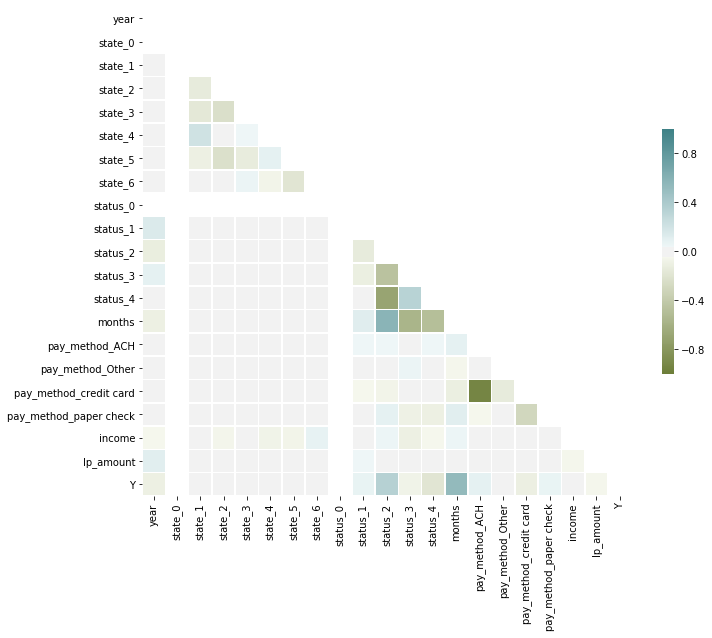

In [68]:
### I AM USING THIS CODE FROM COMPETITION 2 of our Data Mining Project

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [69]:
# Exporting the balanced data to a csv file to be used in the other classification models
data.to_csv('final_data.csv',',')